___
# T is for Table

This is a demo jupyter notebook of the T(.) library in https://github.com/al3xandr3/T

___

## Import libraries

In [1]:
## remove this, this is for my personal pc setup
import sys; import os; sys.path.append(os.path.expanduser('~/DropBox/my/projects/T/'))

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas   as pd
import operator as op

import numpy             as np
import seaborn           as sns
from datetime import datetime

import pyscope
from pyscope import read_ss

from IPython.display import IFrame

from T import * # want T to be accessible


%load_ext autoreload
%autoreload

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Data

In [3]:
df = pd.DataFrame({'user':['k','j','k','t','k','j'] \
                 , 'date': [datetime.strptime(d, '%Y-%m-%d') for d in ['2018-10-16', '2018-10-16', '2018-10-17', '2018-10-17', '2018-10-18', '2018-10-19']]
                 , 'period':['before', 'before', 'before', 'before', 'after','after'] \
                 , 'cohort':['control','control','control','control','control','control'] \
                 , 'isLabel':[0,1,1,1,0,1]
                 , 'kpi':[5,6,7,8,9,10]})

Building a T( ) is the same

In [4]:
t2 = T({'user':['k','j','k','t','k','j'] \
                 , 'date': [datetime.strptime(d, '%Y-%m-%d') for d in ['2018-10-16', '2018-10-16', '2018-10-17', '2018-10-17', '2018-10-18', '2018-10-19']]
                 , 'period':['before', 'before', 'before', 'before', 'after','after'] \
                 , 'cohort':['control','control','control','control','control','control'] \
        , 'isLabel':[0,1,1,1,0,1]         
        , 'kpi':[5,6,7,8,9,10]})

## Table manipulations

In [5]:
T(df).select("kpi")

,kpi
0,5
1,6
2,7
3,8
4,9
5,10


In [6]:
T(df).where("isLabel", 0)

,user,date,period,cohort,isLabel,kpi
0,k,2018-10-16,before,control,0,5
4,k,2018-10-18,after,control,0,9


In [7]:
T(df).where("isLabel", 0, op.ne) # not equal

,user,date,period,cohort,isLabel,kpi
1,j,2018-10-16,before,control,1,6
2,k,2018-10-17,before,control,1,7
3,t,2018-10-17,before,control,1,8
5,j,2018-10-19,after,control,1,10


In [8]:
T(df).relabel("isLabel", "theLabel")

,user,date,period,cohort,theLabel,kpi
0,k,2018-10-16,before,control,0,5
1,j,2018-10-16,before,control,1,6
2,k,2018-10-17,before,control,1,7
3,t,2018-10-17,before,control,1,8
4,k,2018-10-18,after,control,0,9
5,j,2018-10-19,after,control,1,10


In [9]:
T(df).row(0)

array(['k', Timestamp('2018-10-16 00:00:00'), 'before', 'control', 0, 5],
      dtype=object)

In [10]:
T(df).group("user")

,user
k,3
j,2
t,1


In [11]:
T(df).sort("kpi", ascending=False)

,user,date,period,cohort,isLabel,kpi
5,j,2018-10-19,after,control,1,10
4,k,2018-10-18,after,control,0,9
3,t,2018-10-17,before,control,1,8
2,k,2018-10-17,before,control,1,7
1,j,2018-10-16,before,control,1,6
0,k,2018-10-16,before,control,0,5


In [12]:
# Style
numeric_col_mask = df.dtypes.apply(lambda d: issubclass(np.dtype(d).type, np.number))

df.style.format(lambda x: '{:,.0f}'.format(x) if x > 1e3 else '{:,.2f}'.format(x), # format the numeric values
                subset=pd.IndexSlice[:,df.columns[numeric_col_mask]])

,user,date,period,cohort,isLabel,kpi
0,k,2018-10-16 00:00:00,before,control,0.00,5.00
1,j,2018-10-16 00:00:00,before,control,1.00,6.00
2,k,2018-10-17 00:00:00,before,control,1.00,7.00
3,t,2018-10-17 00:00:00,before,control,1.00,8.00
4,k,2018-10-18 00:00:00,after,control,0.00,9.00
5,j,2018-10-19 00:00:00,after,control,1.00,10.00


## EDA

In [13]:
T(df).variance("kpi")

2.9166666666666665

In [14]:
T(df).std("kpi")

1.707825127659933

In [15]:
T(df).avg("kpi")

7.5

In [16]:
T(df).median("kpi")

7.5

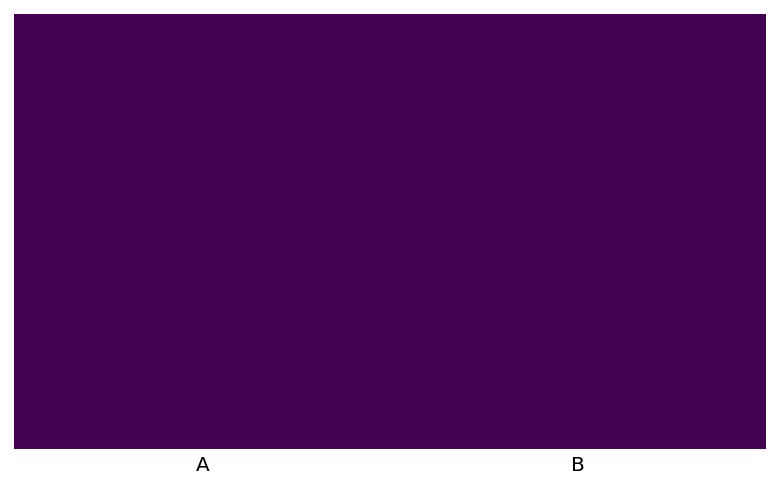

In [17]:
T(np.random.normal(size=(37,2)), columns=['A', 'B'] ).showna() # show NA's

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

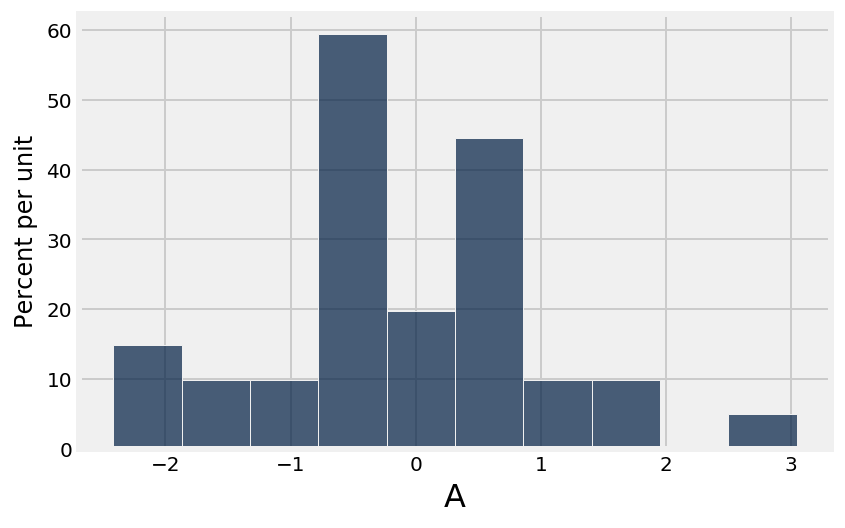

In [18]:
T(np.random.normal(size=(37,2)), columns=['A', 'B']).histogram('A')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC5E513390>]],
      dtype=object)

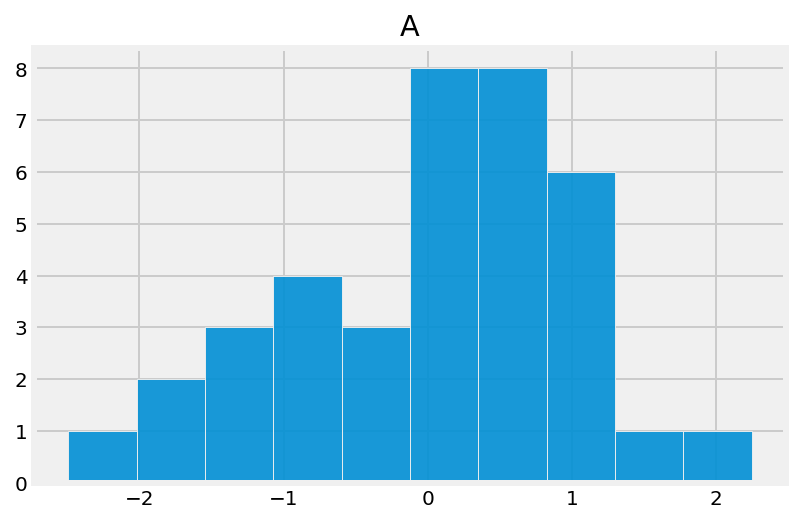

In [19]:
pd.DataFrame(np.random.normal(size=(37,2)), columns=['A', 'B']).hist(column='A', alpha=0.9)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

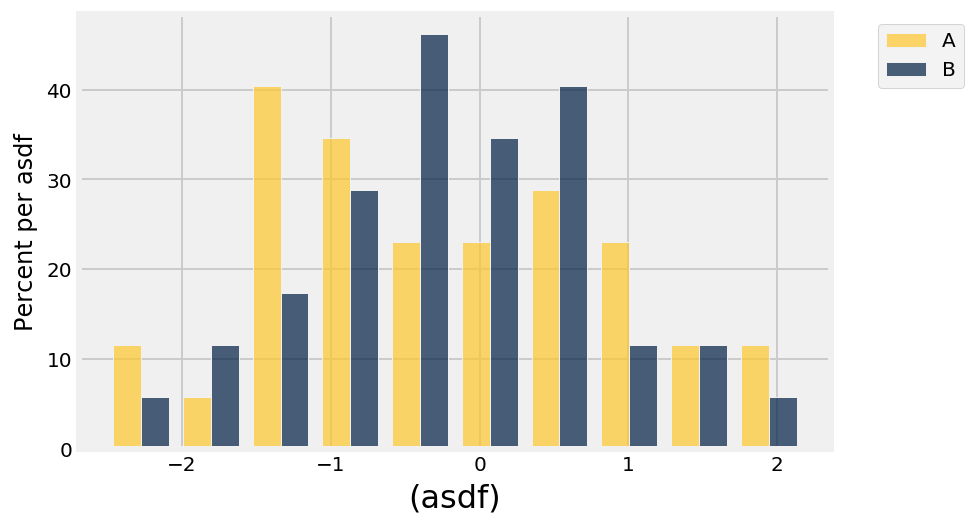

In [20]:
T(np.random.normal(size=(37,2)), columns=['A', 'B']).histogram('A', 'B', unit="asdf", side_by_side=True)

,decile,median,avg,count
0,0,49.5,49.5,100.0
1,1,149.5,149.5,100.0
2,2,249.5,249.5,100.0
3,3,349.5,349.5,100.0
4,4,449.5,449.5,100.0
5,5,549.5,549.5,100.0
6,6,649.5,649.5,100.0
7,7,749.5,749.5,100.0
8,8,849.5,849.5,100.0
9,9,949.5,949.5,100.0


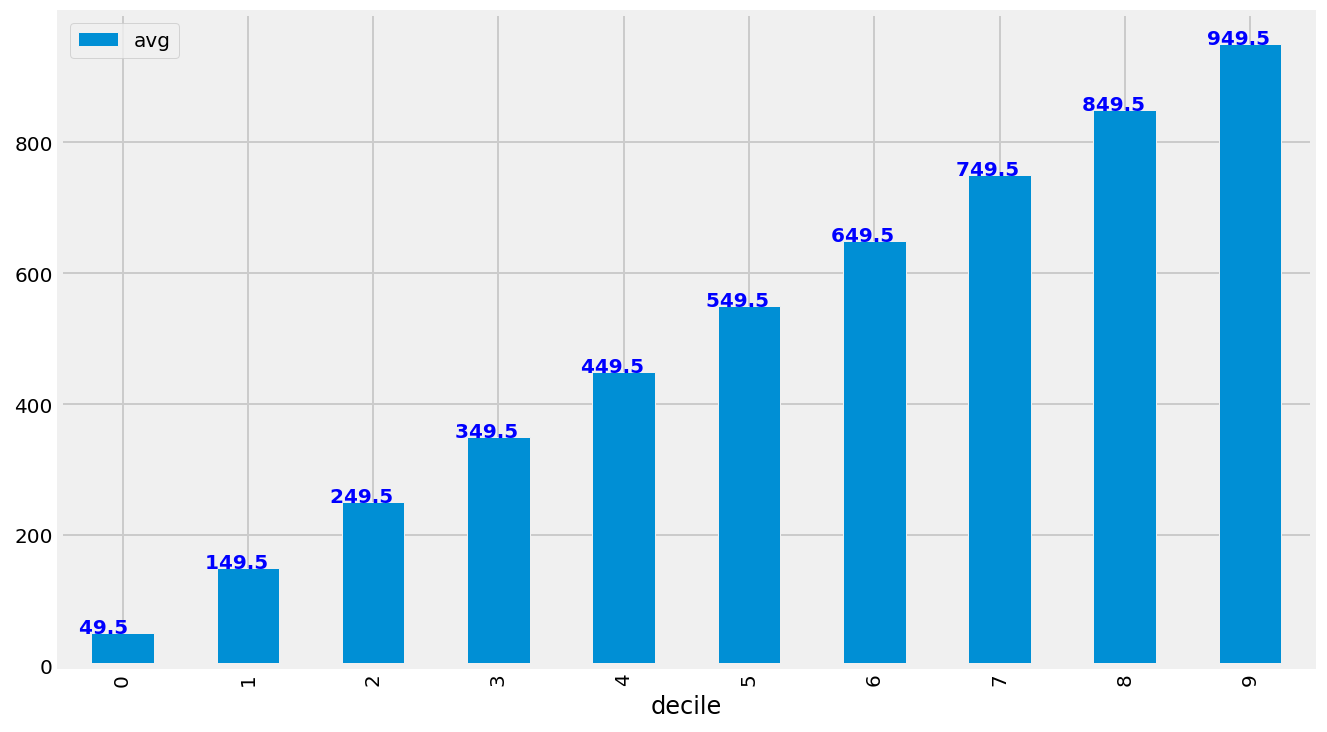

In [21]:
T(pd.DataFrame( np.arange(1000), columns=['kpi']) ).decile('kpi')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


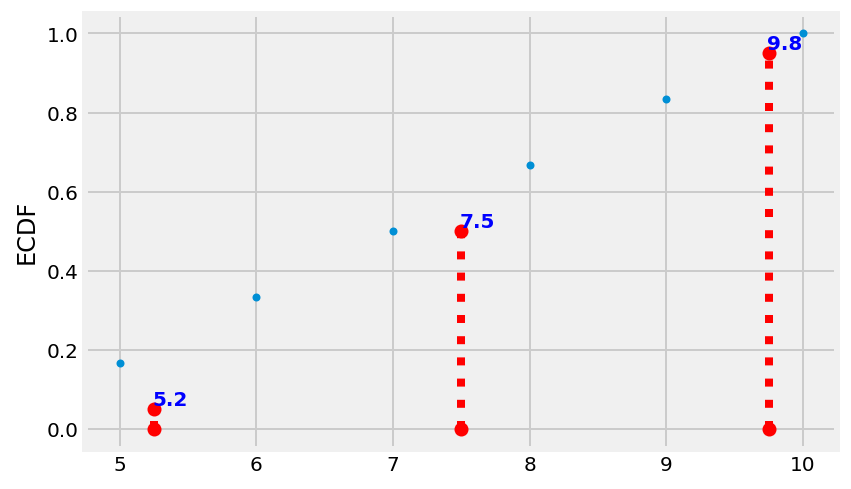

In [22]:
T(df).ecdf("kpi") # shows the: 5%, 50% and 95% percentile

## Stat Inference, CI

{'mean': 0.17589480853482697,
 '95% conf int of mean': array([-0.1607888 ,  0.52386283])}

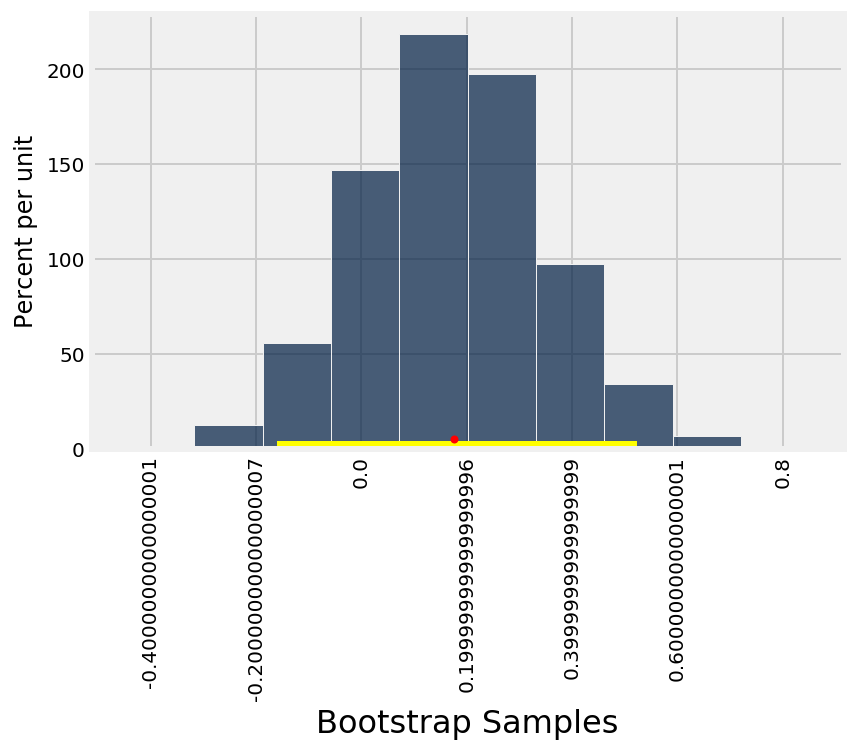

In [23]:
T(np.random.normal(size=(37,2)), columns=['A', 'B']).ci_mean('A')

{'median': 0.000880408320646712,
 '95% conf int of median': array([-0.31448355,  0.26100796])}

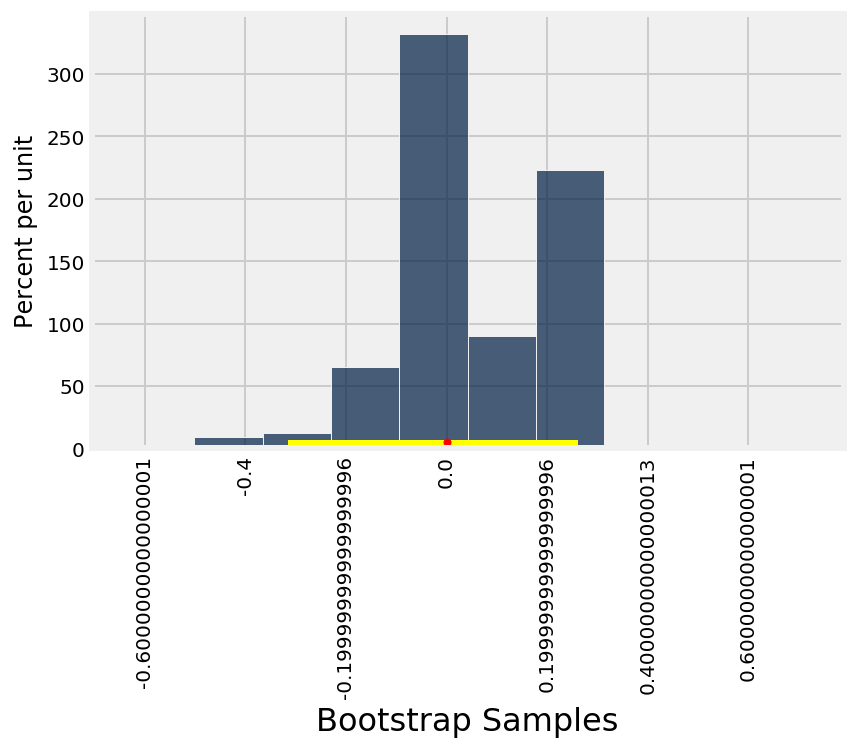

In [24]:
T(np.random.normal(size=(37,2)), columns=['A', 'B']).ci_median('A')

,isLabel
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


{'Proportion of 1s': 0.2, '95% Conf. Int. of Proportion': [0.175, 0.225]}

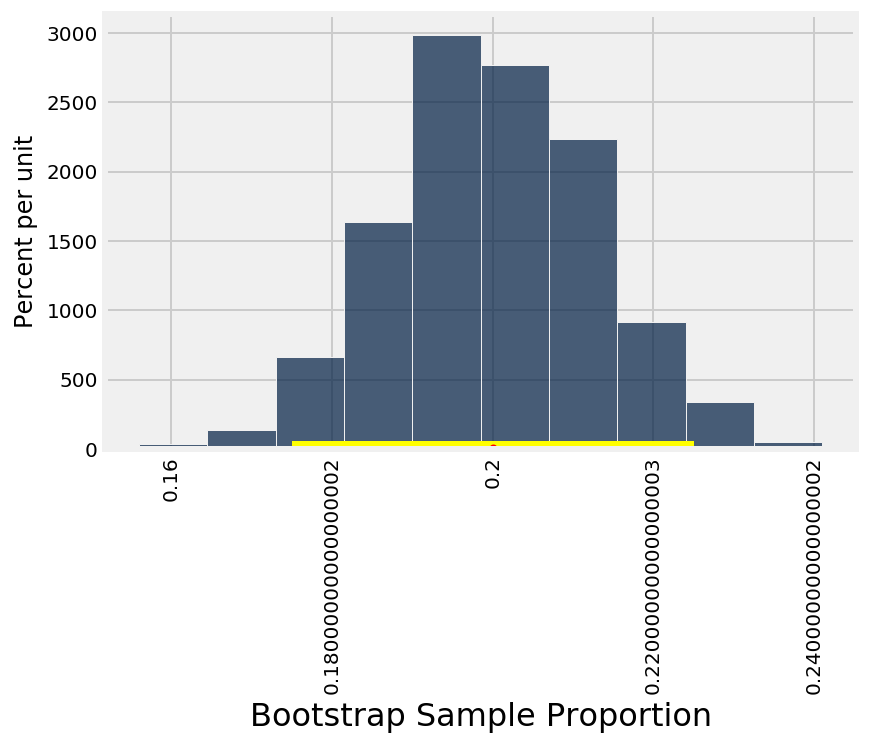

In [25]:
# test of proportion
display(T(np.hstack((np.ones(200), np.zeros(800) )), columns=['isLabel']).head())
T(np.hstack((np.ones(200), np.zeros(800) )), columns=['isLabel'] ).ci_proportion('isLabel')

## Hypothesis testing

In [26]:

a = T(np.random.normal(0, size=(10,1)), columns=["values"])
a['label'] = '2'
b = T(np.random.normal(1, size=(10,1)), columns=["values"])
b['label'] = '1'

k = pd.concat([a, b])
k.head()

,values,label
0,-1.012990,2
1,-1.129456,2
2,-0.441145,2
3,0.577243,2
4,-0.599989,2


Wall time: 53.5 s


{'Observed Difference': -1.4579279538201,
 'p-value': 0.008000000000000007,
 'decision': 'Significant Difference',
 'Null Hypothesis Bootstrap Differences': array([ 0.70207888, -0.6203164 ,  0.41020522, ...,  0.47239743,
         0.29472616, -0.08743546])}

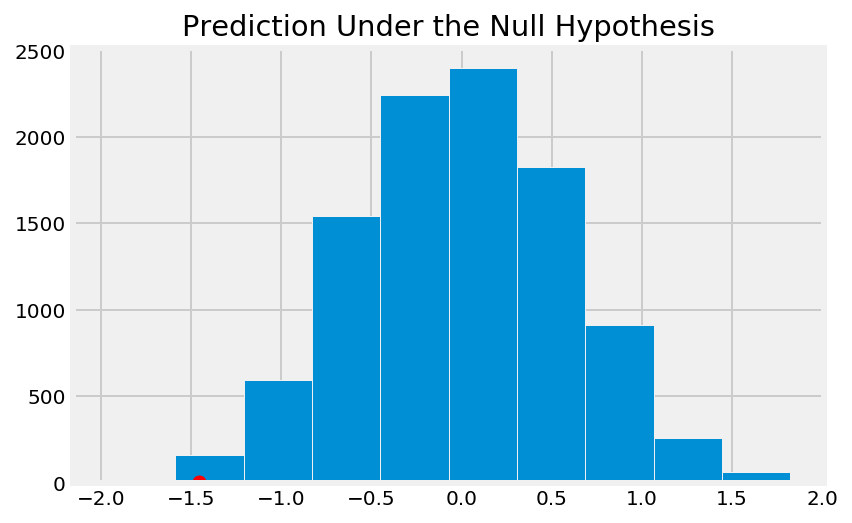

In [27]:
%%time
k.hypothesis_mean_diff("values", "label")